# Import Utilities

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
os.chdir('/content/gdrive/My Drive/DS532')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np
import pandas as pd
comments = pd.read_csv("comment_bangkok-hospital.csv")

In [0]:
from tqdm import tqdm_notebook

# Read data

In [0]:
rama = pd.read_csv("comment_bangkok-hospital.csv")
rama = rama.reset_index()
rama = rama.rename(columns={"index": "cid"})

# Sentence Tokenize

In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
from nltk import sent_tokenize

sentences = []
cids = []
for cid in rama["cid"]:
    s = sent_tokenize(rama.loc[cid, "en"])
    sentences = sentences + s
    cids = cids + [cid] * len(s)

# Sentence-level sentiment

In [10]:
import nltk
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [11]:
!pip install twython

In [0]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [0]:
def predict_sentiment(sentence):
  sa = SentimentIntensityAnalyzer()
  sentiment_distribution = sa.polarity_scores(sentence)
  score = sentiment_distribution.get("compound")
  
  if score >= 0.05:
    return "positive"
  elif score <= -0.05:
    return "negative"
  else:
    return "neutral"

In [14]:
sentiments = []
for sentence in tqdm_notebook(sentences, total=len(sentences)):
    sentiments.append(predict_sentiment(sentence))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


# Parsing

In [15]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [0]:
from nltk import word_tokenize, pos_tag, RegexpParser

In [0]:
grammar = """NP: {<NN|NNS>+}
                 {<NN|NNS>+<CC><NN|NNS>+}"""
chunker = RegexpParser(grammar)
parse_trees = []
for sentence in sentences:
    parse_trees.append(chunker.parse(pos_tag(word_tokenize(sentence))))

In [18]:
parse_trees

[Tree('S', [Tree('NP', [('Doctor', 'NN')]), ('of', 'IN'), ('Medicine', 'NNP'), ('at', 'IN'), ('the', 'DT'), Tree('NP', [('front', 'NN')]), ('friendly', 'RB'), ('.', '.')]),
 Tree('S', [('The', 'DT'), Tree('NP', [('disease', 'NN')]), ('is', 'VBZ'), ('diagnosed', 'JJ'), ('quickly', 'RB'), ('Doctor', 'NNP'), ('explains', 'VBZ'), ('fine', 'JJ'), ('Pretty', 'NNP'), ('good', 'JJ'), Tree('NP', [('care', 'NN')]), ('of', 'IN'), Tree('NP', [('employees', 'NNS')]), ('notice', 'VBP'), ('a', 'DT'), ('smaller', 'JJR'), Tree('NP', [('jar', 'NN'), ('queue', 'NN')]), ('as', 'RB'), ('well', 'RB'), ('informed', 'JJ'), Tree('NP', [('patient', 'NN')]), ('always', 'RB'), ('.', '.')]),
 Tree('S', [('Waited', 'VBD'), ('a', 'DT'), ('long', 'JJ'), Tree('NP', [('time', 'NN')]), ('coming', 'VBG'), (',', ','), ('but', 'CC'), ('if', 'IN'), ('the', 'DT'), Tree('NP', [('patient', 'NN')]), ('is', 'VBZ'), ('cold', 'JJ'), (',', ','), ('but', 'CC'), ('I', 'PRP'), ('was', 'VBD'), ('a', 'DT'), ('little', 'JJ'), Tree('NP', 

# Extract Noun Phrase

In [0]:
def extract_np(parsed_tree):
    nps = []
    for subtree in parsed_tree.subtrees():
        if subtree.label() == 'NP':
            t = subtree
            t = " ".join(word for word, tag in t.leaves())
            nps.append(t)
    return nps

In [0]:
nps = []
for parse_tree in parse_trees:
    nps.append(extract_np(parse_tree))

In [21]:
nps

[['Doctor', 'front'],
 ['disease', 'care', 'employees', 'jar queue', 'patient'],
 ['time', 'patient', 'bit'],
 [],
 ['people'],
 ['match', 'results', 'lab'],
 ['care department'],
 ['care', 'patients'],
 ['nurses', 'nature', 'disease', 'disease'],
 ['worsen', 'sets', 'experience', 'model', 'weeks'],
 ['Hospitals', 'symptoms'],
 ['activities'],
 ['yoga classes', 'classes', 'talk', 'psychotherapist'],
 ['concerns'],
 ['psychologist'],
 ['medication', 'check', 'psychiatrist'],
 ['love'],
 ['service', 'guests', 'people', 'interpreters', 'quality'],
 ['service'],
 ['love', 'everyone'],
 ['quality service'],
 ['personnel',
  'time',
  'treatment',
  'everything',
  'ants',
  'treatments',
  'results'],
 [],
 [],
 [],
 ['pregnancy', 'women', 'doctors', 'nurses', 'care'],
 ['child', 'circumcision son'],
 ['cut wounds', 'doctor appointments', 'order', 'lesion'],
 ['milk', 'milk'],
 ['milk ducts massage'],
 [],
 ['time',
  'lives',
  'decisions',
  'doctors',
  'times',
  'hospital',
  'emergenc

# Put information into DataFrame

In [0]:
df = pd.DataFrame({"cids": cids, 
                   "sentences": sentences, 
                   "sentiments": sentiments, 
                   "NP": nps})

In [23]:
df.head(10)

,cids,sentences,sentiments,NP
0,0,Doctor of Medicine at the front friendly.,positive,"[Doctor, front]"
1,0,The disease is diagnosed quickly Doctor explai...,positive,"[disease, care, employees, jar queue, patient]"
2,0,"Waited a long time coming, but if the patient ...",negative,"[time, patient, bit]"
3,0,"Overall, then it's hard.",negative,[]
4,0,Quick and easy good for people who do not want...,positive,[people]
5,0,But if the match has to wait for lab results t...,neutral,"[match, results, lab]"
6,1,Been to maintain the spiritual care department.,positive,[care department]
7,1,Department of care of psychiatric patients.,positive,"[care, patients]"
8,1,All nurses understand the nature of the diseas...,neutral,"[nurses, nature, disease, disease]"
9,1,No worsen All sets come with great experience ...,negative,"[worsen, sets, experience, model, weeks]"


# Split dataframe into positive and negative sentiment

In [0]:
pos = df[df["sentiments"] == "positive"].reset_index(drop=True)
pos_words = sum(pos["NP"].tolist(), [])
pos_words = [word.lower() for word in pos_words]
poshist = pd.DataFrame({"words": pos_words})
poshist = poshist.groupby("words").size().reset_index(name="#pos")

In [0]:
neg = df[df["sentiments"] == "negative"].reset_index(drop=True)
neg_words = sum(neg["NP"].tolist(), [])
neg_words = [word.lower() for word in neg_words]
neghist = pd.DataFrame({"words": neg_words})
neghist = neghist.groupby("words").size().reset_index(name="#neg")

# Word Cloud Representation

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [0]:
def vizwordcloud(df):
    tuples = [tuple(x) for x in df.values]
    wordcloud = WordCloud().generate_from_frequencies(dict(tuples))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

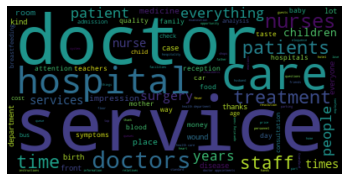

In [28]:
vizwordcloud(poshist)

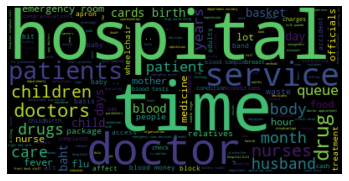

In [29]:
vizwordcloud(neghist)

We saw 2 problems: 1) Singular and plural words were not combined and 2) words that should not be appeared in the wordcloud such as *patients* because of the co-reference resolution problem.  

Let's transfrom selected words to their singular form because at this stage the number of words is not much already then add categories to filter out.

In [0]:
def plural2singular(word):
  if word == "doctors":
    return "doctor"
  elif word == "nurses":
    return "nurse"
  elif word == "clinics":
    return "clinic"
  elif word == "hospitals":
    return "hospital"
  elif word == "services":
    return "service"
  elif word == "staffs":
    return "staff"
  elif word == "treatments":
    return "treatment"
  elif word == "students":
    return "student"
  else:
    return word

In [0]:
pos_words = [plural2singular(word) for word in pos_words]
poshist = pd.DataFrame({"words": pos_words})
poshist = poshist.groupby("words").size().reset_index(name="#pos")

neg_words = [plural2singular(word) for word in neg_words]
neghist = pd.DataFrame({"words": neg_words})
neghist = neghist.groupby("words").size().reset_index(name="#neg")

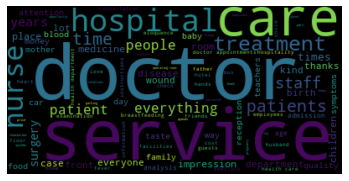

In [32]:
vizwordcloud(poshist)

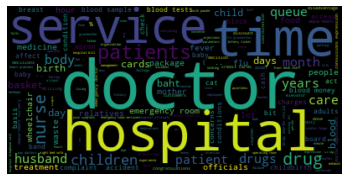

In [33]:
vizwordcloud(neghist)

In [0]:
def groups(word):
    if word in ("doctor", "nurse", "student"):
        return "staff"
    elif word in ("hospital", "clinic", "equipment", "place"):
        return "infrastructure"
    elif word in ("service", "care", "treatment", "surgery", "disease", "medical care"):
        return "service"
    elif word in ("queue", "appointment"):
        return "process"
    elif word in ("price", "claim"):
        return "finance"
    else:
        return "others"

In [0]:
poshist["category"] = poshist["words"].apply(lambda x: groups(x))
poscount = poshist.groupby("category").size().reset_index(name="#")
poscount = poscount[poscount["category"] != "others"].reset_index(drop=True)

In [0]:
neghist["category"] = neghist["words"].apply(lambda x: groups(x))
negcount = neghist.groupby("category").size().reset_index(name="#")
negcount = negcount[negcount["category"] != "others"].reset_index(drop=True)

# Plot Radar Chart

In [37]:
poscount

,category,#
0,finance,1
1,infrastructure,3
2,process,2
3,service,5
4,staff,2


In [0]:
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode,  plot

In [39]:
fig = px.line_polar(poscount, r="#", theta="category", line_close=True)
plot(fig)

'temp-plot.html'

In [40]:
fig = px.line_polar(negcount, r="#", theta="category", line_close=True)
plot(fig)

'temp-plot.html'